In [21]:
USE_PCA = True

In [22]:
# Loading the data
import pandas as pd
import numpy as np
team_season = pd.read_csv('data/team_season.txt')
player_season = pd.read_csv('data/player_regular_season.txt')
coaches_season = pd.read_csv('data/coaches_season.txt')
player_allstar = pd.read_csv('data/player_allstar.txt')
player_biological = pd.read_csv('data/players.txt')

print('Data loaded!')
print('team_season shape:', team_season.shape)
print('player_season shape:', player_season.shape)
print('coaches_season shape:', coaches_season.shape)
print('player_allstar shape:', player_allstar.shape)
print('player_biological shape:', player_biological.shape)

Data loaded!
team_season shape: (1187, 36)
player_season shape: (19112, 23)
coaches_season shape: (1241, 10)
player_allstar shape: (1462, 23)
player_biological shape: (3572, 11)


In [23]:
# We want to convert our height to a single unit, inches
player_biological["height"] = player_biological["h_feet"]*12 + player_biological["h_inches"]

# only keep ilkid, height, weight
player_biological = player_biological[[
    "ilkid", 
    "height", 
    "weight"
]]

player_biological.head()

,ilkid,height,weight
0,ABDELAL01,82.0,240.0
1,ABDULKA01,86.0,225.0
2,ABDULMA01,73.0,162.0
3,ABDULTA01,78.0,223.0
4,ABDURSH01,81.0,225.0


In [24]:
# fga and fgm are field goals attempted and made, we can simply calculate the field goal percentage
player_season["fg%"] = np.where(player_season["fga"] == 0, 0, player_season["fgm"]/player_season["fga"])
# fta and ftm are free throws attempted and made, we can simply calculate the free throw percentage
player_season["ft%"] = np.where(player_season["fta"] == 0, 0, player_season["ftm"]/player_season["fta"])
# tpa and tpm are three points attempted and made, we can simply calculate the three point percentage
player_season["3p%"] = np.where(player_season["tpa"] == 0, 0, player_season["tpm"]/player_season["tpa"])


## We could optionally calculate them on an average per game basis
player_season["pts_pg"] = player_season["pts"]/player_season["gp"]
player_season["oreb_pg"] = player_season["oreb"]/player_season["gp"]
player_season["dreb_pg"] = player_season["dreb"]/player_season["gp"]
player_season["reb_pg"] = player_season["reb"]/player_season["gp"]
player_season["asts_pg"] = player_season["asts"]/player_season["gp"]
player_season["stl_pg"] = player_season["stl"]/player_season["gp"]
player_season["blk_pg"] = player_season["blk"]/player_season["gp"]
player_season["turnover_pg"] = player_season["turnover"]/player_season["gp"]
player_season["pf_pg"] = player_season["pf"]/player_season["gp"]

player_season = player_season[[ 
    'ilkid', 'team', 'year', # basic info    
    'fg%', 'ft%', '3p%', # shooting
    # all the stats
    'gp', 'minutes', 'pts', 'oreb', 'dreb', 'reb', 'asts', 
    'stl', 'blk', 'turnover', 'pf', 
    # or per game stats
    # 'pts_pg', 'oreb_pg', 'dreb_pg', 'reb_pg', 'asts_pg', 'stl_pg', 'blk_pg', 'turnover_pg', 'pf_pg' # per game
]]

# merge with player bio data
player_season = player_season.merge(player_biological, on='ilkid', how='left')

player_season.head()

,ilkid,team,year,fg%,ft%,3p%,gp,minutes,pts,oreb,dreb,reb,asts,stl,blk,turnover,pf,height,weight
0,ABRAMJO01,PIT,1946,0.242206,0.691011,0.0,47,0,527,0,0,0,35,0,0,0.0,161,75.0,195.0
1,AUBUCCH01,DE1,1946,0.252747,0.542857,0.0,30,0,65,0,0,0,20,0,0,0.0,46,70.0,137.0
2,BAKERNO01,CH1,1946,0.000000,0.000000,0.0,4,0,0,0,0,0,0,0,0,0.0,0,72.0,180.0
3,BALTIHE01,ST1,1946,0.201521,0.463768,0.0,58,0,138,0,0,0,16,0,0,0.0,98,76.0,195.0
4,BARRJO01,ST1,1946,0.283105,0.594937,0.0,58,0,295,0,0,0,54,0,0,0.0,164,75.0,205.0


In [25]:
# identify all star players and add a column to player_season with a boolean value
player_allstar["allstar"] = 1
player_allstar = player_allstar[["ilkid", "year", "allstar"]]
# it is not upper case in player_allstar
player_allstar["ilkid"] = player_allstar["ilkid"].astype(str).str.upper()
# strip whitespace from ilkid
player_allstar["ilkid"] = player_allstar["ilkid"].str.strip()
player_season["ilkid"] = player_season["ilkid"].astype(str).str.upper()

player_season_allstar = pd.merge(
    player_season, player_allstar,
    on=['ilkid', 'year'],
    how='left'
)
player_season_allstar["allstar"] = player_season_allstar["allstar"].fillna(0)
# print all star players
player_season_allstar[player_season_allstar["ilkid"] == "ABDULKA01"]

,ilkid,team,year,fg%,ft%,3p%,gp,minutes,pts,oreb,dreb,reb,asts,stl,blk,turnover,pf,height,weight,allstar
3492,ABDULKA01,MIL,1969,0.518232,0.652759,0.000000,82,3534,2361,0,0,1190,337,0,0,0.0,283,86.0,225.0,1.0
3846,ABDULKA01,MIL,1970,0.576777,0.690162,0.000000,82,3288,2596,0,0,1311,272,0,0,0.0,264,86.0,225.0,1.0
4228,ABDULKA01,MIL,1971,0.574047,0.688525,0.000000,81,3583,2822,0,0,1346,370,0,0,0.0,235,86.0,225.0,1.0
4637,ABDULKA01,MIL,1972,0.554176,0.713043,0.000000,76,3254,2292,0,0,1224,379,0,0,0.0,208,86.0,225.0,1.0
5039,ABDULKA01,MIL,1973,0.538943,0.702381,0.000000,81,3548,2191,287,891,1178,386,112,283,0.0,238,86.0,225.0,1.0
5407,ABDULKA01,MIL,1974,0.512626,0.762911,0.000000,65,2747,1949,194,718,912,264,65,212,0.0,205,86.0,225.0,1.0
5807,ABDULKA01,LAL,1975,0.528935,0.702830,0.000000,82,3379,2275,272,1111,1383,413,119,338,0.0,292,86.0,225.0,1.0
6191,ABDULKA01,LAL,1976,0.579256,0.701493,0.000000,82,3016,2152,266,824,1090,319,101,261,0.0,262,86.0,225.0,1.0
6548,ABDULKA01,LAL,1977,0.550207,0.782857,0.000000,62,2265,1600,186,615,801,269,103,185,208.0,182,86.0,225.0,0.0
6922,ABDULKA01,LAL,1978,0.576837,0.736287,0.000000,80,3157,1903,207,818,1025,431,76,316,282.0,230,86.0,225.0,1.0


In [26]:
# team_season data
# we can also simplify some data here
# how many points they scored per game 
# divided by the number of times they had the ball
team_season["offensive_rating"] = np.where(
    team_season['pace'] > 0,
    team_season['o_pts'] / team_season['pace'] * 100,
    0
)
# how many points they allowed per game
# divided by the number of times the other team had the ball
team_season["defensive_rating"] = np.where(
    team_season['pace'] > 0,
    team_season['d_pts'] / team_season['pace'] * 100,
    0
)
# and the difference between the two
team_season["net_rating"] = team_season["offensive_rating"] - team_season["defensive_rating"]
# then some of the same percentages as the player data
team_season["fg%"] = np.where(team_season["o_fga"] == 0, 0, team_season["o_fgm"]/team_season["o_fga"])
team_season["ft%"] = np.where(team_season["o_fta"] == 0, 0, team_season["o_ftm"]/team_season["o_fta"])
team_season["3p%"] = np.where(team_season["o_3pa"] == 0, 0, team_season["o_3pm"]/team_season["o_3pa"])
total_games = team_season['won'] + team_season['lost']
team_season["win%"] = np.where(total_games == 0, 0, team_season['won']/total_games)

team_season = team_season[[
    'team', 'year', # basic info
    'offensive_rating', 'defensive_rating', 'net_rating', # ratings
    'fg%', 'ft%', '3p%', 'win%', # shooting and winning
    'pace', 'won', 'lost' # pace and wins
]]

team_season.head()

,team,year,offensive_rating,defensive_rating,net_rating,fg%,ft%,3p%,win%,pace,won,lost
0,BOS,1946,0.0,0.0,0.0,0.272161,0.589818,0.0,0.366667,0.0,22,38
1,CH1,1946,0.0,0.0,0.0,0.297828,0.605806,0.0,0.639344,0.0,39,22
2,CL1,1946,0.0,0.0,0.0,0.293736,0.632353,0.0,0.500000,0.0,30,30
3,DE1,1946,0.0,0.0,0.0,0.245935,0.617805,0.0,0.333333,0.0,20,40
4,NYK,1946,0.0,0.0,0.0,0.278782,0.661335,0.0,0.550000,0.0,33,27


# Method 2 - Clustering of players into categories
We can cluster players into different categories based on their statistics and then use the cluster statistics as supplementary features to predict the outcome of the match. Additionally, we detect outliers during this phase.

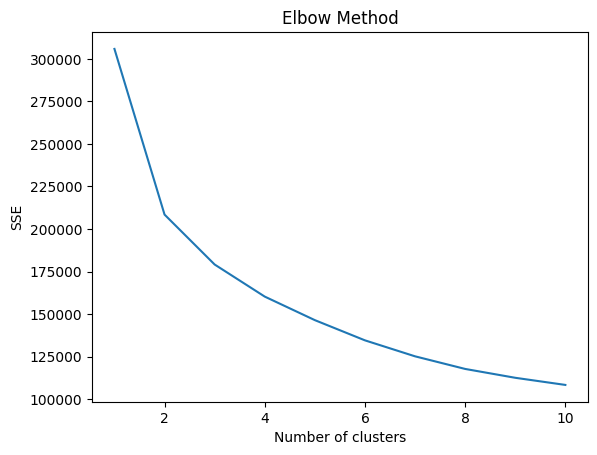

In [27]:
from sklearn.preprocessing import StandardScaler

# Way 2 - K-means clustering of players
kmeans_player_df = player_season_allstar.drop(['ilkid', 'year', 'team', 'allstar'], axis=1)
kmeans_player_df= kmeans_player_df.fillna(0)
kmeans_player_df = pd.DataFrame(kmeans_player_df)
# Standardize the data
scaler = StandardScaler()
kmeans_player_df = scaler.fit_transform(kmeans_player_df)

# Clustering with K-means
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(kmeans_player_df)
    sse.append(kmeans.inertia_)

#plotting the elbow plot
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


In [28]:
# Thus we choose k=3
clusters=5
kmeans = KMeans(n_clusters=clusters)
kmeans.fit(kmeans_player_df)
player_season_allstar['cluster'] = kmeans.labels_
player_season_allstar.head()


,ilkid,team,year,fg%,ft%,3p%,gp,minutes,pts,oreb,...,reb,asts,stl,blk,turnover,pf,height,weight,allstar,cluster
0,ABRAMJO01,PIT,1946,0.242206,0.691011,0.0,47,0,527,0,...,0,35,0,0,0.0,161,75.0,195.0,0.0,1
1,AUBUCCH01,DE1,1946,0.252747,0.542857,0.0,30,0,65,0,...,0,20,0,0,0.0,46,70.0,137.0,0.0,1
2,BAKERNO01,CH1,1946,0.000000,0.000000,0.0,4,0,0,0,...,0,0,0,0,0.0,0,72.0,180.0,0.0,1
3,BALTIHE01,ST1,1946,0.201521,0.463768,0.0,58,0,138,0,...,0,16,0,0,0.0,98,76.0,195.0,0.0,1
4,BARRJO01,ST1,1946,0.283105,0.594937,0.0,58,0,295,0,...,0,54,0,0,0.0,164,75.0,205.0,0.0,1


### Player Outlier Detection

In [29]:
# Simple way to identify outliers using the 95th percentile of the distances
import numpy as np
# make kmeas_player_df a pandas dataframe
kmeans_player_df = pd.DataFrame(kmeans_player_df)
distances = np.linalg.norm(kmeans_player_df - kmeans.cluster_centers_[kmeans.labels_], axis=1)
threshold = np.percentile(distances, 95)
outliers = kmeans_player_df[distances > threshold]
matching_outliers = player_season_allstar.loc[outliers.index]
matching_outliers['ilkid']

2        BAKERNO01
15       BROWNLE01
24       CORLEKE01
36       ELIASDO01
90       KELLEKE01
           ...    
18920     ONEASH01
18946    PODKOPA01
18961     REEDJU01
18989    SEUNGHA01
19025    TABUSYU01
Name: ilkid, Length: 956, dtype: object

In [30]:
# A more sophisticated way to identify outliers using Isolation Forest
from sklearn.ensemble import IsolationForest

# Fit the model
iso_forest = IsolationForest(contamination=0.05)  # 5% contamination
iso_forest.fit(kmeans_player_df)

# Predict outliers
outliers = iso_forest.predict(kmeans_player_df)
outliers = kmeans_player_df[outliers == -1]  # -1 means outlier

matching_outliers = player_season_allstar.loc[outliers.index]
matching_outliers['ilkid']


1878     CHAMBWI01
1970     BAYLOEL01
1979     CHAMBWI01
2063     BELLAWA01
2078     CHAMBWI01
           ...    
19025    TABUSYU01
19040    THOMAKU01
19061     WADEDW01
19065    WALKEAN01
19067    WALLABE01
Name: ilkid, Length: 956, dtype: object

In [35]:
teams_clusters = player_season_allstar[['team', 'year', 'cluster']]

# Group by 'teams' and 'cluster', then count the occurrences of each 'cluster' for each 'team'
teams_clusters = teams_clusters.groupby(['team', 'year', 'cluster']).size().unstack(fill_value=0)
teams_clusters = teams_clusters.reset_index()
# convert column names to strings
teams_clusters.columns = teams_clusters.columns.astype(str)
teams_clusters.columns.name = None
teams_clusters.head()

,team,year,0,1,2,3,4
0,ANA,1967,2,9,4,4,0
1,AND,1949,0,12,1,3,0
2,ATL,1968,0,5,8,0,0
3,ATL,1969,0,4,6,3,0
4,ATL,1970,0,4,6,2,0


In [36]:
# merge with team_season data
team_season_cluster = team_season.merge(teams_clusters, on=['team', 'year'], how='left')
team_season_cluster = team_season_cluster.fillna(0)
team_season_cluster.head()

,team,year,offensive_rating,defensive_rating,net_rating,fg%,ft%,3p%,win%,pace,won,lost,0,1,2,3,4
0,BOS,1946,0.0,0.0,0.0,0.272161,0.589818,0.0,0.366667,0.0,22,38,0,20,0,0,0
1,CH1,1946,0.0,0.0,0.0,0.297828,0.605806,0.0,0.639344,0.0,39,22,0,16,0,0,0
2,CL1,1946,0.0,0.0,0.0,0.293736,0.632353,0.0,0.500000,0.0,30,30,0,18,0,0,0
3,DE1,1946,0.0,0.0,0.0,0.245935,0.617805,0.0,0.333333,0.0,20,40,0,15,0,0,0
4,NYK,1946,0.0,0.0,0.0,0.278782,0.661335,0.0,0.550000,0.0,33,27,0,20,0,0,0


# Data Normalization

In [38]:
from sklearn.preprocessing import StandardScaler

features = ['offensive_rating', 'defensive_rating', 'net_rating',
       'fg%', 'ft%', '3p%', 'pace',
]
for i in range(clusters):
       features.append(str(i))

scaler = StandardScaler()
normalized_dataframe = team_season_cluster.copy()
normalized_dataframe[features] = scaler.fit_transform(team_season_cluster[features])
normalized_dataframe.head()

,team,year,offensive_rating,defensive_rating,net_rating,fg%,ft%,3p%,win%,pace,won,lost,0,1,2,3,4
0,BOS,1946,-1.429173,-1.429605,-0.002095,-4.143252,-4.887207,-0.414935,0.366667,-1.436687,22,38,-1.356421,4.953222,-0.581852,-1.832655,-1.274048
1,CH1,1946,-1.429173,-1.429605,-0.002095,-3.543018,-4.386355,-0.414935,0.639344,-1.436687,39,22,-1.356421,3.636283,-0.581852,-1.832655,-1.274048
2,CL1,1946,-1.429173,-1.429605,-0.002095,-3.638725,-3.554753,-0.414935,0.500000,-1.436687,30,30,-1.356421,4.294753,-0.581852,-1.832655,-1.274048
3,DE1,1946,-1.429173,-1.429605,-0.002095,-4.756517,-4.010499,-0.414935,0.333333,-1.436687,20,40,-1.356421,3.307048,-0.581852,-1.832655,-1.274048
4,NYK,1946,-1.429173,-1.429605,-0.002095,-3.988409,-2.646847,-0.414935,0.550000,-1.436687,33,27,-1.356421,4.953222,-0.581852,-1.832655,-1.274048


In [39]:
matchups = []
for year in normalized_dataframe['year'].unique():
    year_data = normalized_dataframe[normalized_dataframe['year'] == year]
    teams = year_data['team'].unique()
    for i in range(len(teams)):
        # so we dont compare the same teams against each other
        for j in range(len(teams)):
            if teams[i] == teams[j]:
                continue
            
            team1_data = year_data[year_data['team'] == teams[i]].iloc[0]
            team2_data = year_data[year_data['team'] == teams[j]].iloc[0]
            match_features = {}
            for feat in features:
                match_features[feat] = team1_data[feat] - team2_data[feat]
            # we use a simple heuristic to determine the winner
            match_features['winner'] = 1 if team1_data['win%'] > team2_data['win%'] else 0
            matchups.append(match_features)
            
matchups_df = pd.DataFrame(matchups)
matchups_df.head()

,offensive_rating,defensive_rating,net_rating,fg%,ft%,3p%,pace,0,1,2,3,4,winner
0,0.0,0.0,0.0,-0.600234,-0.500853,0.0,0.0,0.0,1.316939,0.0,0.000000,0.0,0
1,0.0,0.0,0.0,-0.504527,-1.332455,0.0,0.0,0.0,0.658470,0.0,0.000000,0.0,0
2,0.0,0.0,0.0,0.613265,-0.876708,0.0,0.0,0.0,1.646174,0.0,0.000000,0.0,1
3,0.0,0.0,0.0,-0.154843,-2.240360,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0
4,0.0,0.0,0.0,-0.194094,-3.074727,0.0,0.0,0.0,3.292348,0.0,-0.428221,0.0,0


# Dimensionality Reduction

In [40]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [41]:
def pca_analysis(X, feature_names):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    # Calculate variance ratios
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

    # Create component loadings DataFrame
    loadings = pca.components_.T
    loading_df = pd.DataFrame(
        loadings,
        columns=[f'PC{i+1}' for i in range(loadings.shape[1])],
        index=feature_names
    )

    return pca, X_pca, explained_variance_ratio, cumulative_variance_ratio, loading_df

In [42]:
X_binary = matchups_df.drop('winner', axis=1)
X_regression = normalized_dataframe[features]

X_binary_pca = pca_analysis(X_binary, features)
X_regression_pca = pca_analysis(X_regression, features)


In [43]:
print("\nBinary Classification PCA Summary:")
print("---------------------------------")
print("Explained Variance Ratios:")
for i, var in enumerate(X_binary_pca[2][:5]):
    print(f"PC{i+1}: {var:.3f} ({X_binary_pca[3][i]:.3f} cumulative)")
n_components_90_binary = np.argmax(X_binary_pca[3] >= 0.9) + 1
print(f"\nComponents needed for 90% variance: {n_components_90_binary}")

print("\nRegression PCA Summary:")
print("----------------------")
print("Explained Variance Ratios:")
for i, var in enumerate(X_regression_pca[2][:5]):
    print(f"PC{i+1}: {var:.3f} ({X_regression_pca[3][i]:.3f} cumulative)")
n_components_90_regression = np.argmax(X_regression_pca[3] >= 0.9) + 1
print(f"\nComponents needed for 90% variance: {n_components_90_regression}")



Binary Classification PCA Summary:
---------------------------------
Explained Variance Ratios:
PC1: 0.253 (0.253 cumulative)
PC2: 0.175 (0.428 cumulative)
PC3: 0.117 (0.545 cumulative)
PC4: 0.096 (0.641 cumulative)
PC5: 0.086 (0.728 cumulative)

Components needed for 90% variance: 8

Regression PCA Summary:
----------------------
Explained Variance Ratios:
PC1: 0.504 (0.504 cumulative)
PC2: 0.144 (0.648 cumulative)
PC3: 0.084 (0.732 cumulative)
PC4: 0.082 (0.814 cumulative)
PC5: 0.056 (0.869 cumulative)

Components needed for 90% variance: 6


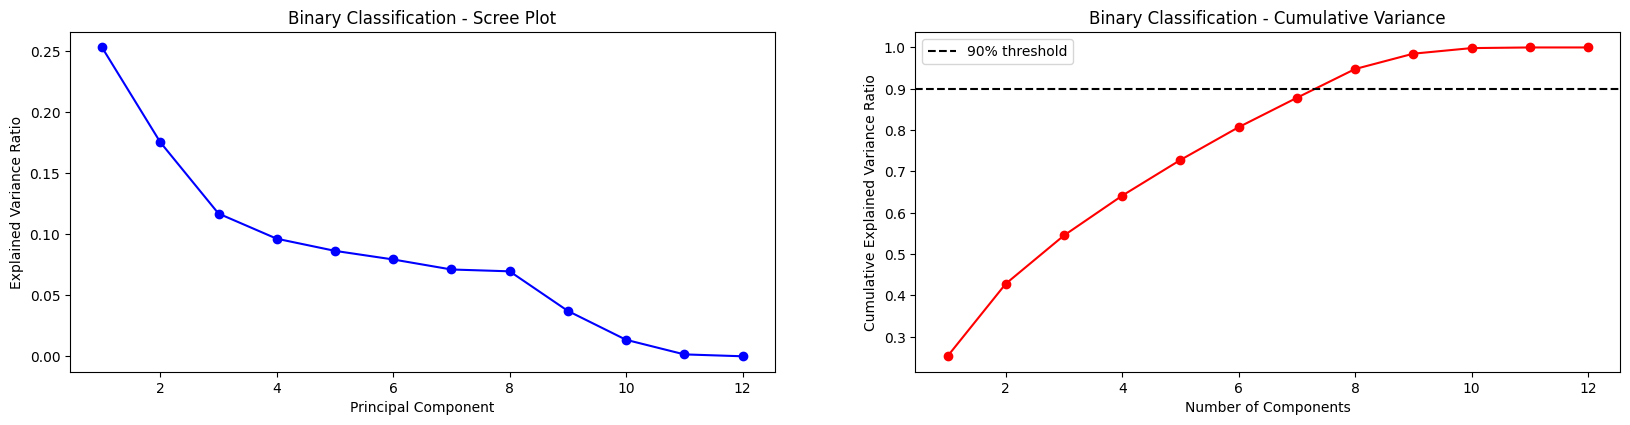

In [44]:
%matplotlib inline
fig = plt.figure(figsize=(20, 15))

plt.subplot(321)
plt.plot(range(1, len(X_binary_pca[2]) + 1), X_binary_pca[2], 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Binary Classification - Scree Plot')

# Cumulative variance
plt.subplot(322)
plt.plot(range(1, len(X_binary_pca[3]) + 1), X_binary_pca[3], 'ro-')
plt.axhline(y=0.9, color='k', linestyle='--', label='90% threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Binary Classification - Cumulative Variance')
plt.legend()


plt.show()


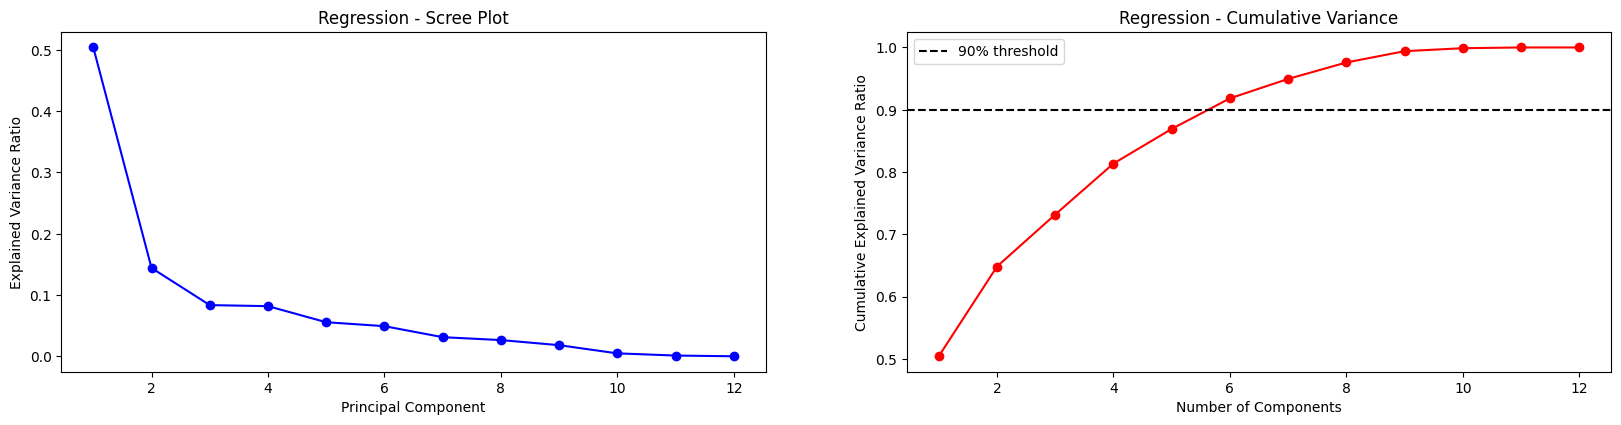

In [45]:
%matplotlib inline
fig = plt.figure(figsize=(20, 15))

# Scree plot
plt.subplot(323)
plt.plot(range(1, len(X_regression_pca[2]) + 1), X_regression_pca[2], 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Regression - Scree Plot')

# Cumulative variance
plt.subplot(324)
plt.plot(range(1, len(X_regression_pca[3]) + 1), X_regression_pca[3], 'ro-')
plt.axhline(y=0.9, color='k', linestyle='--', label='90% threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Regression - Cumulative Variance')
plt.legend()

plt.show()


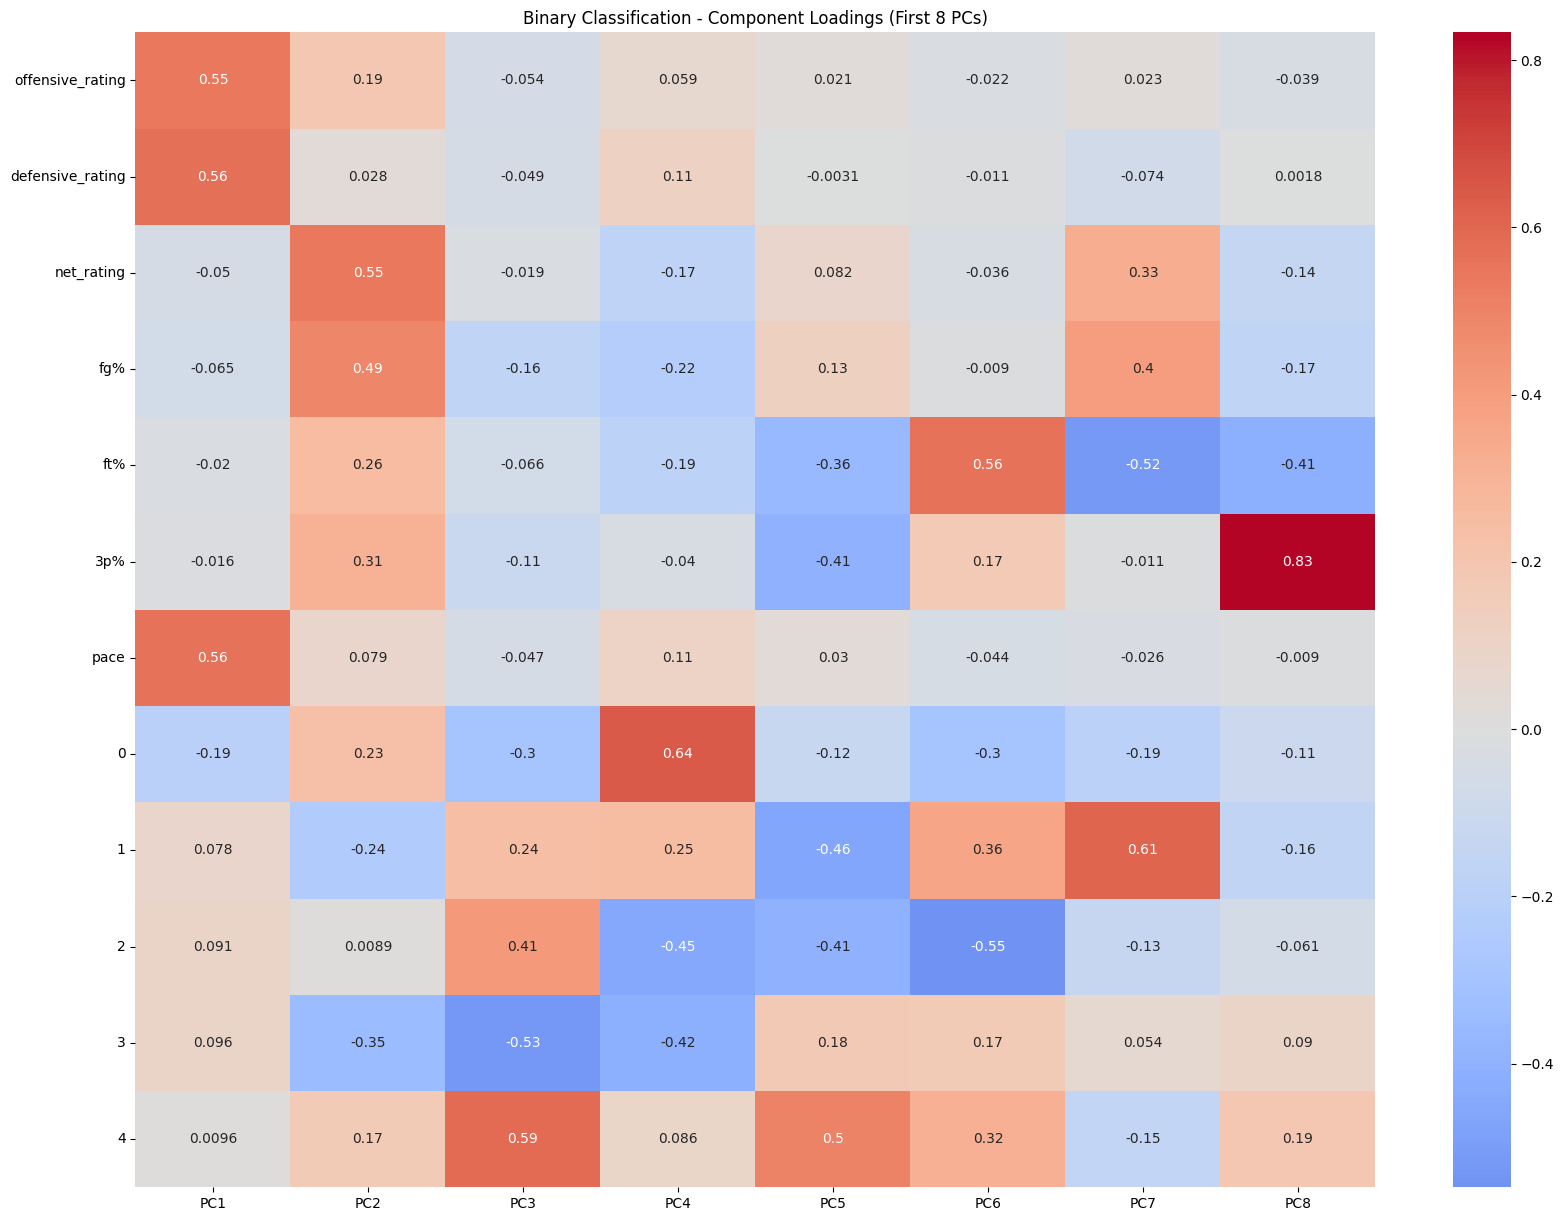

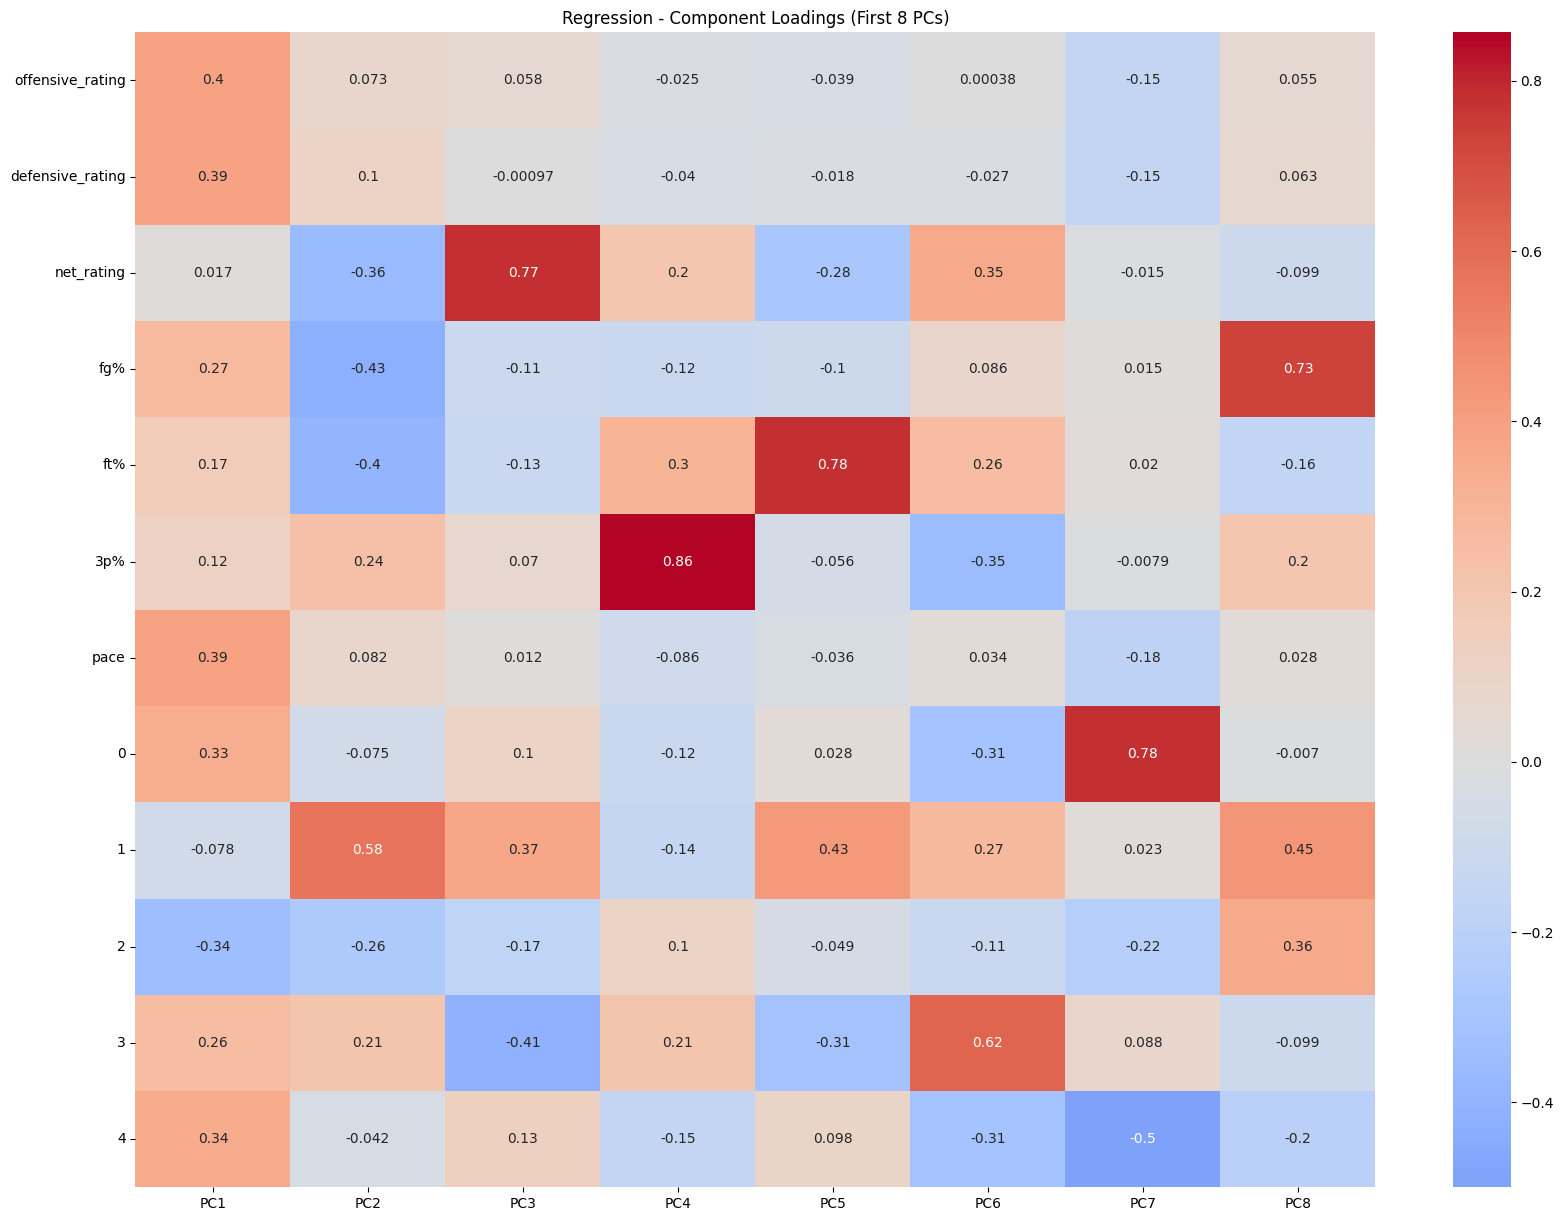

In [46]:
%matplotlib inline
fig = plt.figure(figsize=(20, 15))

# Component loadings heatmaps
sns.heatmap(X_binary_pca[4].iloc[:, :8], annot=True, cmap='coolwarm', center=0)
plt.title('Binary Classification - Component Loadings (First 8 PCs)')
plt.show()

fig = plt.figure(figsize=(20, 15))
sns.heatmap(X_regression_pca[4].iloc[:, :8], annot=True, cmap='coolwarm', center=0)
plt.title('Regression - Component Loadings (First 8 PCs)')
plt.show()



In [47]:
from sklearn.model_selection import train_test_split

X_pca = X_binary_pca[1][:, :n_components_90_binary]
X_raw = X_binary[features]
y = matchups_df['winner']

print(X_pca.shape)
print(X_raw.shape)
print(y.shape)

(26740, 8)
(26740, 12)
(26740,)


In [48]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

def evaluate_model(model, X, y, cv=5):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print("\nBinary Classification K-Fold Results:")
    print("-" * 40)
    print(f"Fold Scores: {cv_scores}")
    print(f"Average Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
print("\nRandom Forest Classifier: PCA Features")
evaluate_model(rf_classifier, X_pca, y)
print("\nRandom Forest Classifier: Raw Features")
evaluate_model(rf_classifier, X_raw, y)



Random Forest Classifier: PCA Features

Binary Classification K-Fold Results:
----------------------------------------
Fold Scores: [0.6867988  0.80011219 0.87621541 0.88089005 0.84311892]
Average Accuracy: 0.8174 (+/- 0.1428)

Random Forest Classifier: Raw Features

Binary Classification K-Fold Results:
----------------------------------------
Fold Scores: [0.68324607 0.84854151 0.92352281 0.92670157 0.93399402]
Average Accuracy: 0.8632 (+/- 0.1903)


In [49]:
# XGBoost Classifier
from sklearn.ensemble import GradientBoostingClassifier

xgb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
print("\nXGBoost Classifier: PCA Features")
evaluate_model(xgb_classifier, X_pca, y)
print("\nXGBoost Classifier: Raw Features")
evaluate_model(xgb_classifier, X_raw, y)


XGBoost Classifier: PCA Features

Binary Classification K-Fold Results:
----------------------------------------
Fold Scores: [0.67707554 0.80983545 0.87509349 0.88107704 0.82255049]
Average Accuracy: 0.8131 (+/- 0.1472)

XGBoost Classifier: Raw Features

Binary Classification K-Fold Results:
----------------------------------------
Fold Scores: [0.66267764 0.85340314 0.92314884 0.92726253 0.9367988 ]
Average Accuracy: 0.8607 (+/- 0.2067)


In [50]:

X_pca = X_regression_pca[1][:, :n_components_90_regression]
X_raw = X_regression[features]
y = normalized_dataframe['win%']

print(X_pca.shape)
print(X_raw.shape)
print(y.shape)

(1187, 6)
(1187, 12)
(1187,)


In [51]:
def evaluate_model_regression(model, X, y, cv=5):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    print("\nRegression K-Fold Results:")
    print("-" * 40)
    print(f"Fold Scores: {cv_scores}")
    print(f"Average R^2: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
print("\nRandom Forest Regressor: PCA Features")
evaluate_model_regression(rf_regressor, X_pca, y)
print("\nRandom Forest Regressor: Raw Features")
evaluate_model_regression(rf_regressor, X_raw, y)


Random Forest Regressor: PCA Features

Regression K-Fold Results:
----------------------------------------
Fold Scores: [-0.81537169  0.15027618  0.88649506  0.90038959  0.79627432]
Average R^2: 0.3836 (+/- 1.3213)

Random Forest Regressor: Raw Features

Regression K-Fold Results:
----------------------------------------
Fold Scores: [-0.70955435  0.25343061  0.90526983  0.92508491  0.90967124]
Average R^2: 0.4568 (+/- 1.2735)


In [52]:
# XGBoost Regressor
from sklearn.ensemble import GradientBoostingRegressor

xgb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
print("\nXGBoost Regressor: PCA Features")
evaluate_model_regression(xgb_regressor, X_pca, y)
print("\nXGBoost Regressor: Raw Features")
evaluate_model_regression(xgb_regressor, X_raw, y)


XGBoost Regressor: PCA Features

Regression K-Fold Results:
----------------------------------------
Fold Scores: [-0.82967352  0.15618441  0.89157517  0.90051788  0.81894538]
Average R^2: 0.3875 (+/- 1.3382)

XGBoost Regressor: Raw Features

Regression K-Fold Results:
----------------------------------------
Fold Scores: [-0.5534456   0.31407673  0.83909553  0.92718888  0.88099356]
Average R^2: 0.4816 (+/- 1.1261)
